In [138]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4, style='darkgrid')
from lr import LogisticRegression
from sklearn.model_selection import train_test_split
from optimizers import SGD, Adam, IRLS
from sklearn.metrics import balanced_accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [137]:
import importlib
import optimizers
importlib.reload(optimizers)

<module 'optimizers' from 'c:\\Users\\User\\Desktop\\Studia\\AML\\AML_project\\src\\optimizers.py'>

## Task 3.2

In [159]:
def run_experiments(data_list, seed_list, optimizer_classes, optimizer_params, include_interactions=False):
    results_df = pd.DataFrame(columns=['seed', 'dataset', 'method', 'balanced_accuracy'])
    for seed in seed_list:
        for i in range(len(data_list)):
            data = data_list[i]
            X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.2, random_state=seed)
            for optimizer_class in optimizer_classes:
                optimizer = optimizer_class(**optimizer_params.get(optimizer_class.__name__, {}))
                model = LogisticRegression(optimizer, early_stopping_rounds=10, epochs=500, include_interactions=include_interactions)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                score = balanced_accuracy_score(y_test, y_pred)
                results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
    return results_df

In [104]:
def plot_boxplots(results_df):
    for optimizer in results_df['method'].unique():
        optimizer_data = results_df[results_df['method'] == optimizer]
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=optimizer_data, x='dataset', y='balanced_accuracy', color=sns.color_palette()[0])
        plt.title(f'Boxplot of Balanced Accuracy for {optimizer}')
        plt.xlabel('Dataset')
        plt.ylabel('Balanced Accuracy')
        plt.show()

In [108]:
with open('data_list.pkl', 'rb') as f:
    data_list = pickle.load(f)

seed_list = [101, 202, 303, 404, 505]
optimizer_classes = [SGD, Adam]
optimizer_params = {
    'SGD': {'learning_rate': 0.0001},
    'Adam': {'learning_rate': 0.0001, 'beta1': 0.9, 'beta2': 0.999}
}

results_df = run_experiments(data_list, seed_list, optimizer_classes, optimizer_params)

Stopping early at epoch 26 with increasing loss


<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWar

Stopping early at epoch 33 with increasing loss


<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWar

Stopping early at epoch 11 with increasing loss


<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWar

Stopping early at epoch 21 with increasing loss


<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWar

Stopping early at epoch 22 with increasing loss


<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWar

Stopping early at epoch 17 with increasing loss


<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-107-3de491cdf81f>:13: FutureWar

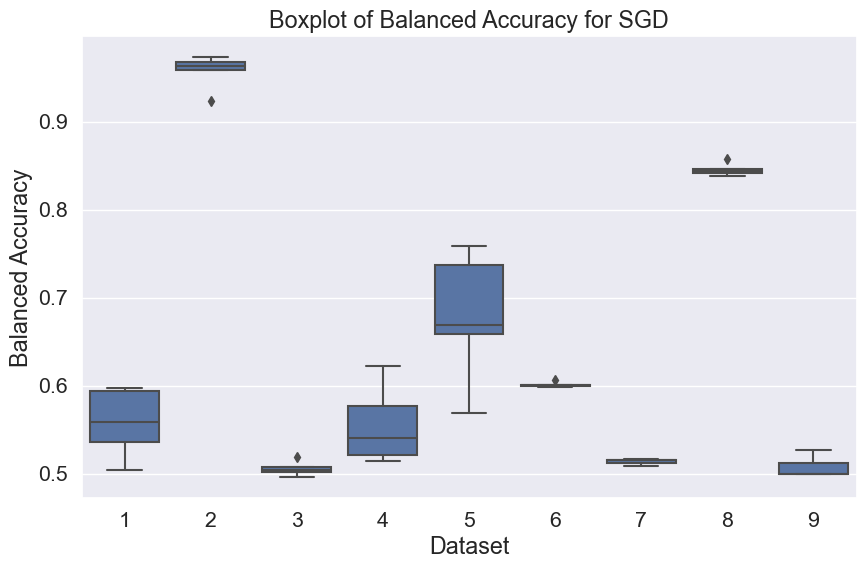

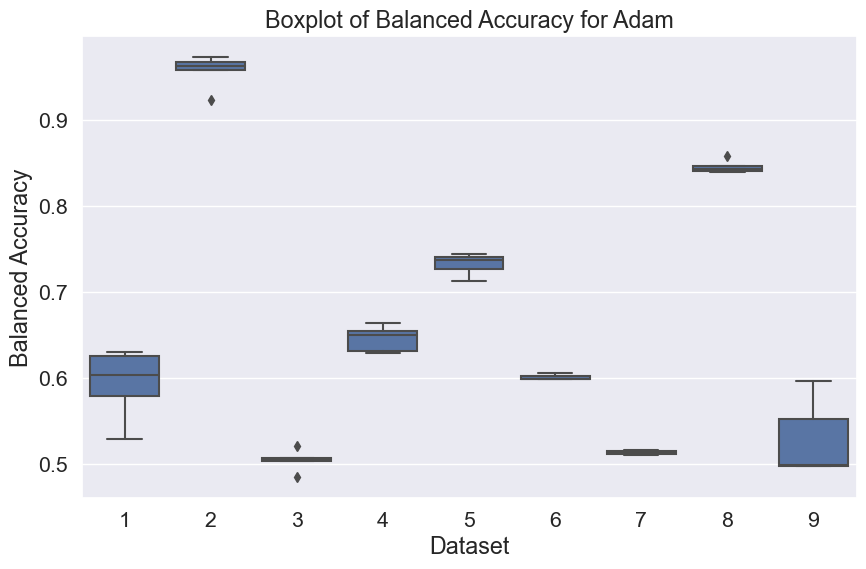

In [109]:
plot_boxplots(results_df)

## Task 3.3

In [143]:
def plot_losses(data_list, optimizer_classes, optimizer_params):
    for optimizer_class in optimizer_classes:
        plt.figure(figsize=(10, 6))
        for i in range(len(data_list)):
            dataset = data_list[i]
            X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.2, random_state=101)
            optimizer = optimizer_class(**optimizer_params.get(optimizer_class.__name__, {}))
            model = LogisticRegression(optimizer, epochs=500)
            model.fit(X_train, y_train)
            plt.plot(model.losses, label='Dataset ' + str(i+1))
        plt.title(f'Model Losses with {type(optimizer).__name__} optimizer')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Log-likelihood')
        plt.show()

c:\Users\User\Desktop\Studia\AML\AML_project\src\lr.py:49: RuntimeWarning: overflow encountered in exp
  Args:


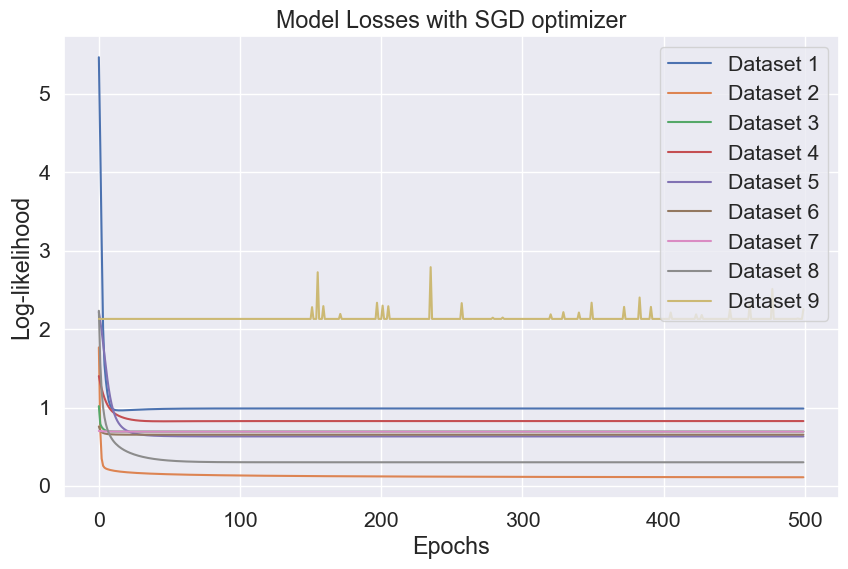

In [111]:
optimizer = SGD(learning_rate=0.0001)
plot_losses(data_list, optimizer)

c:\Users\User\Desktop\Studia\AML\AML_project\src\lr.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


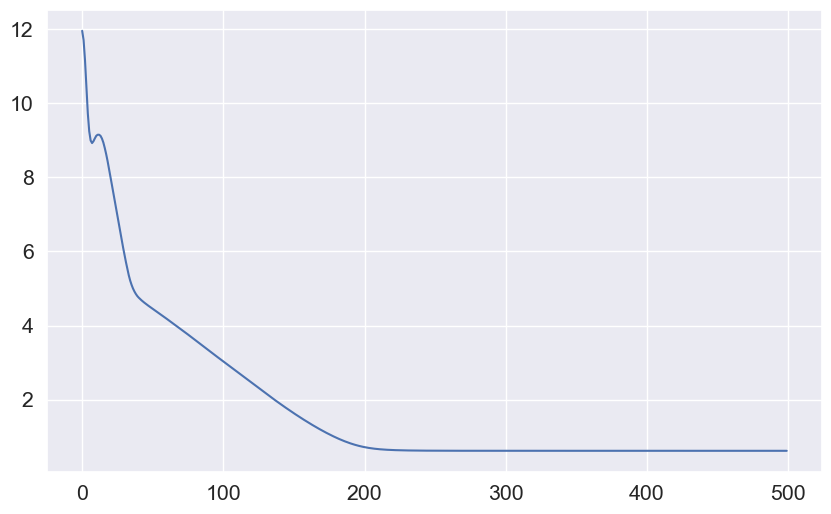

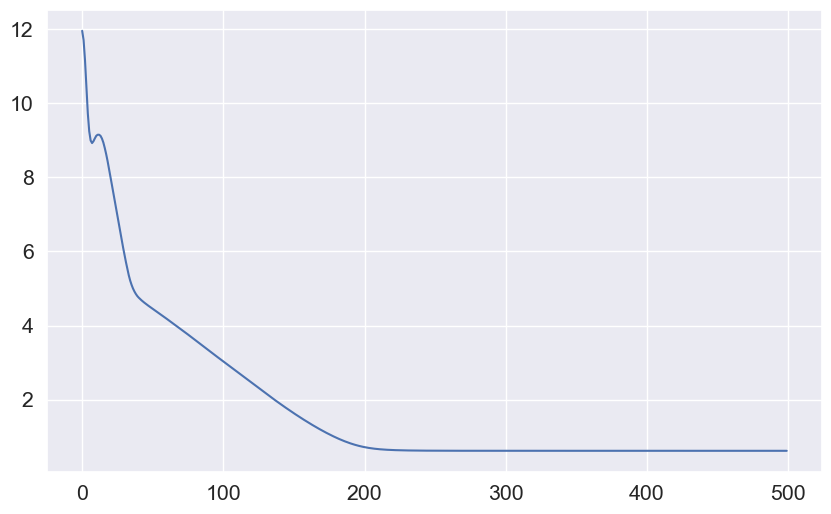

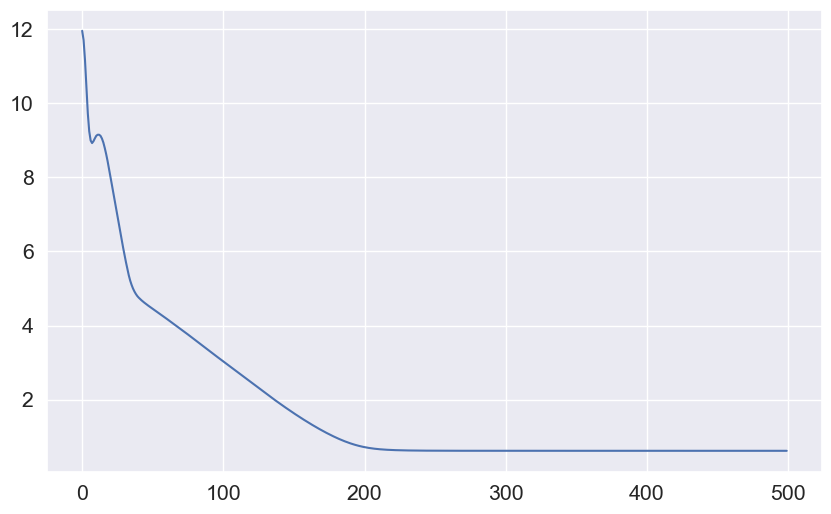

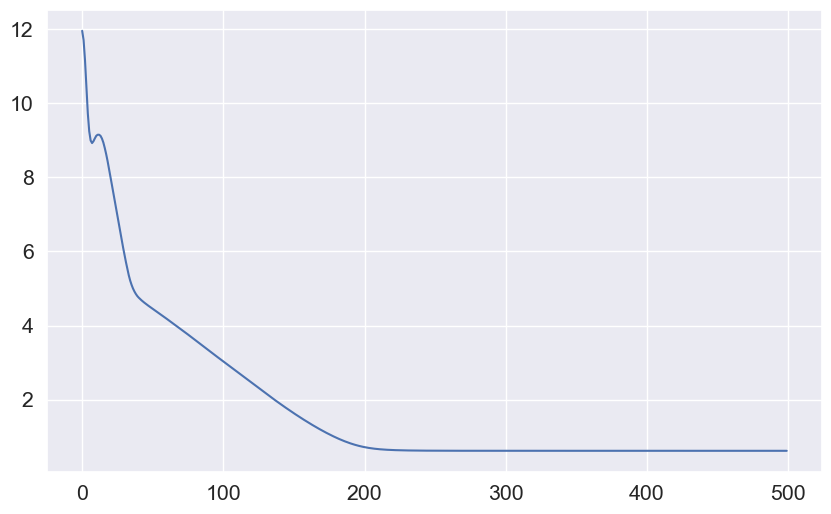

<Figure size 1000x600 with 0 Axes>

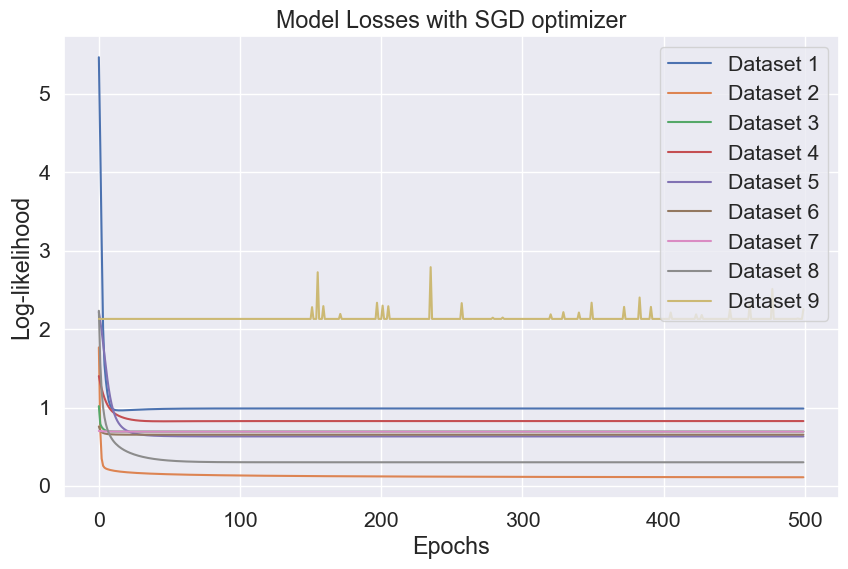

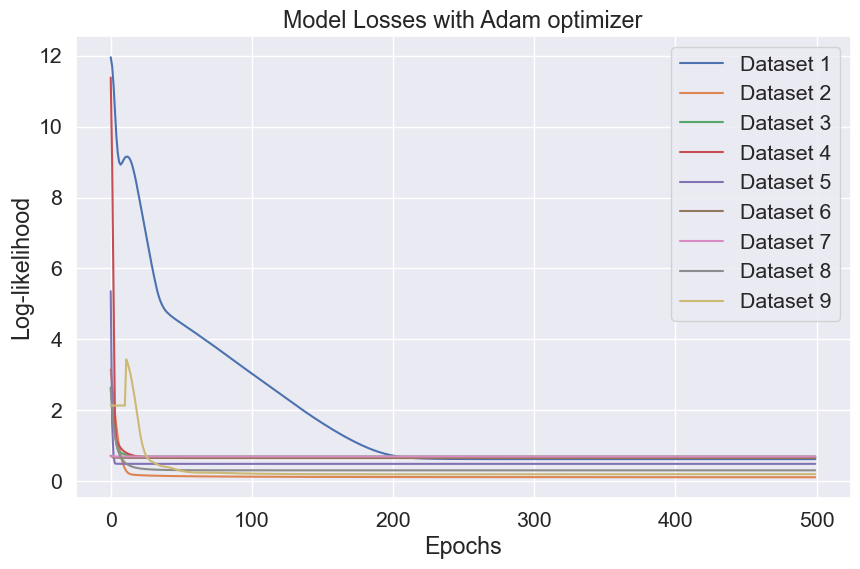

In [144]:
plot_losses(data_list, optimizer_classes, optimizer_params)

## Task 3.4

In [145]:
def run_baseline(data_list, seed_list, classifiers):
    results_df = pd.DataFrame(columns=['seed', 'dataset', 'method', 'balanced_accuracy'])
    for seed in seed_list:
        for i in range(len(data_list)):
            data = data_list[i]
            X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.2, random_state=seed)
            for classifier in classifiers:
                model = classifier()
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                score = balanced_accuracy_score(y_test, y_pred)
                results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': type(model).__name__, 'balanced_accuracy': score}, ignore_index=True)
    return results_df

In [146]:
classifiers = [LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis, DecisionTreeClassifier, RandomForestClassifier]
seed_list = [101, 202, 303, 404, 505]
baseline_results_df = run_baseline(data_list, seed_list, classifiers)

<ipython-input-145-f12cdff29272>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': type(model).__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-145-f12cdff29272>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': type(model).__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-145-f12cdff29272>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': type(model).__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-145-f12cdff29272>:12: FutureWarning: The fr

In [147]:
final_results_df = pd.concat([results_df, baseline_results_df])

In [156]:
def plot_all(results_df):
    for dataset in results_df['dataset'].unique():
        df = results_df[results_df['dataset'] == dataset]
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='method', y='balanced_accuracy', color=sns.color_palette()[0])
        plt.title(f'Boxplot of Balanced Accuracy for Dataset {dataset}')
        plt.xticks(ticks=range(len(df['method'].unique())), labels=['SGD', 'ADAM', 'LDA', 'QDA', 'Decision Tree', 'Random Forest'])
        plt.xlabel('Method')
        plt.ylabel('Balanced Accuracy')
        plt.show()

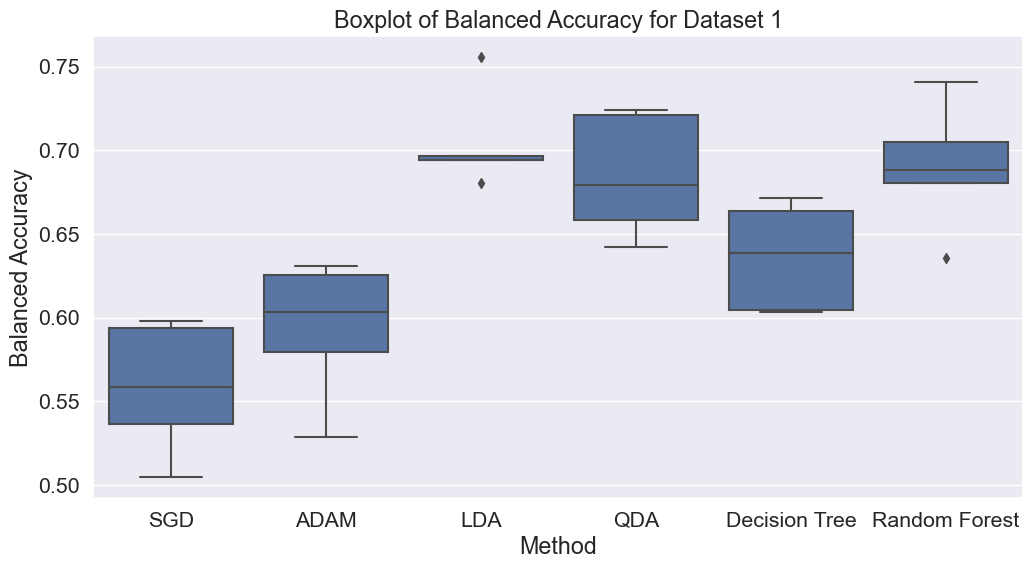

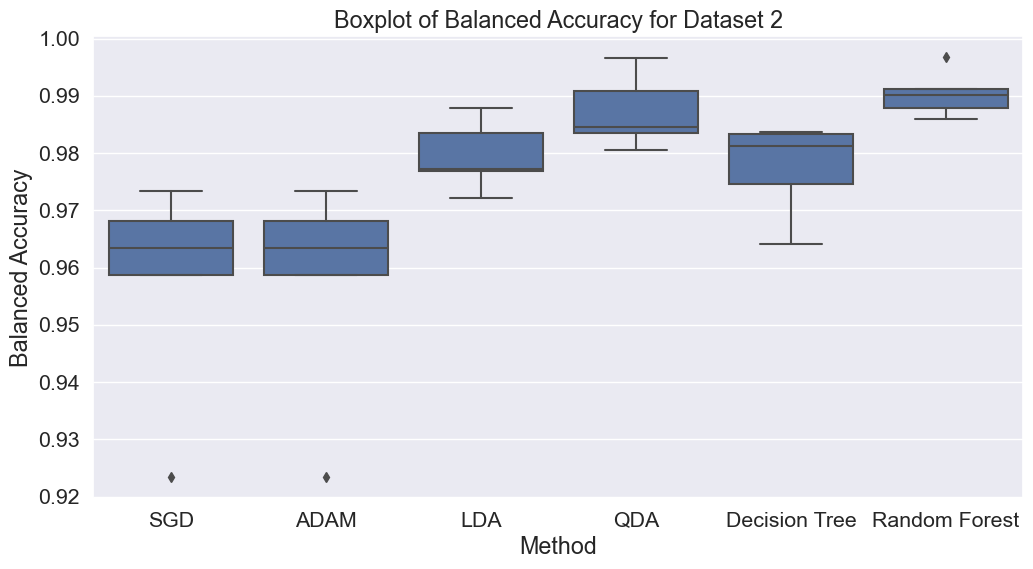

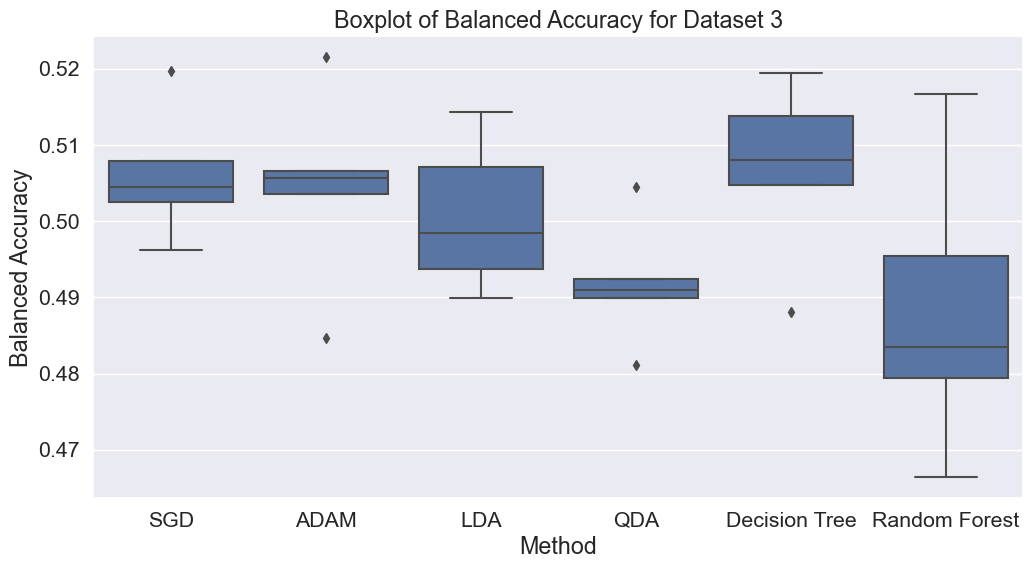

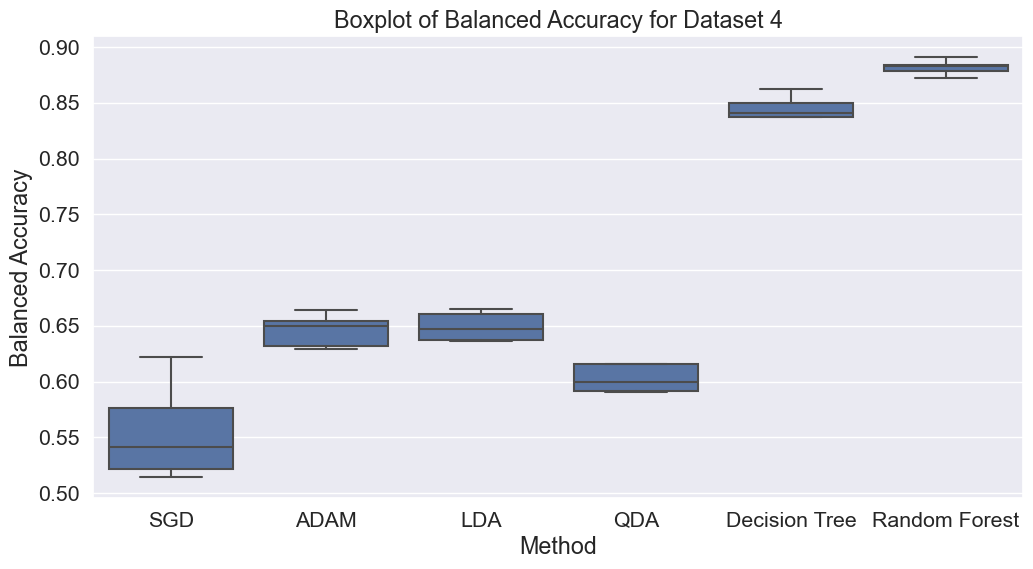

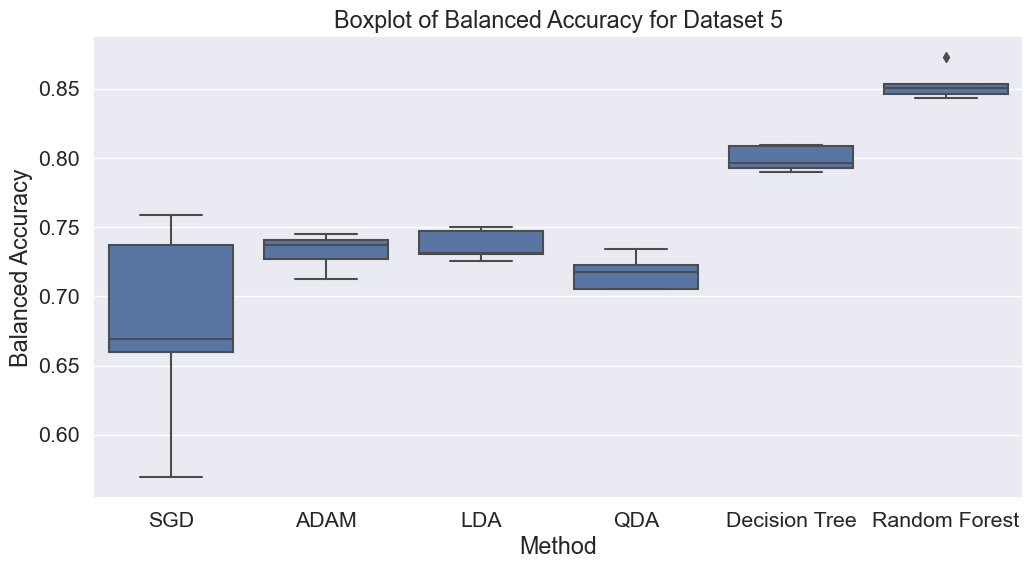

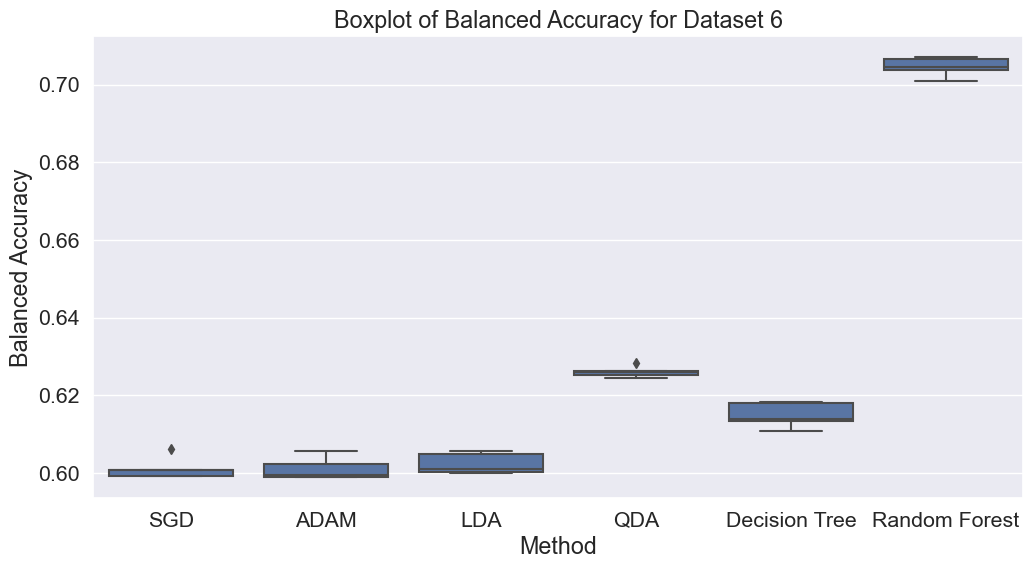

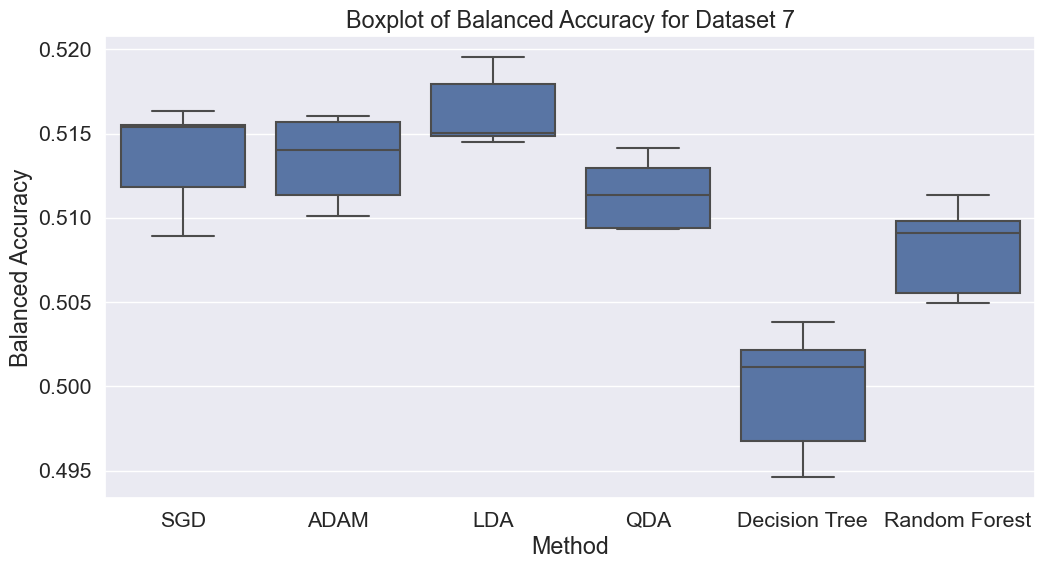

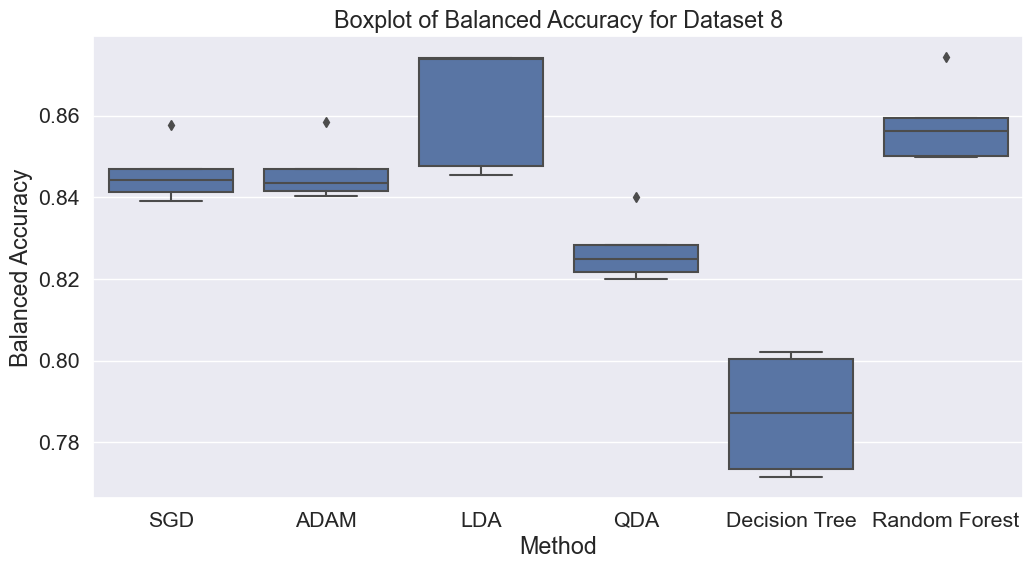

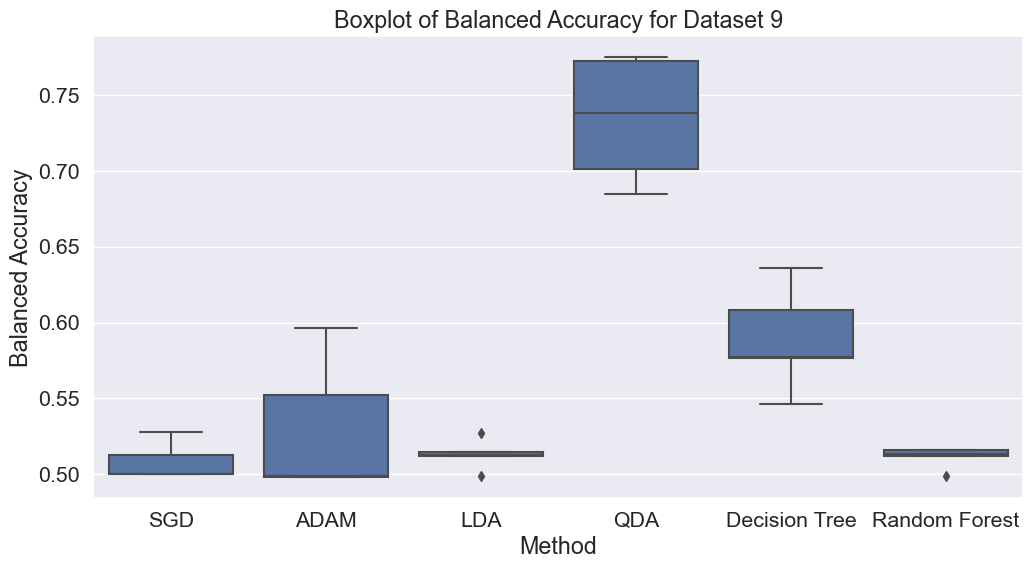

In [157]:
plot_all(final_results_df)

## Task 3.5

In [162]:
data_list_interactions = data_list[:3]
results_interactions = run_experiments(data_list_interactions, seed_list, optimizer_classes, optimizer_params, include_interactions=True)

c:\Users\User\Desktop\Studia\AML\AML_project\src\lr.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-159-a1dbc4ada149>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
c:\Users\User\Desktop\Studia\AML\AML_project\src\lr.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-159-a1dbc4ada149>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-159-a1dbc4ada149>:13: FutureWarning: The frame.append method is deprecated and will

Stopping early at epoch 287 with increasing loss


<ipython-input-159-a1dbc4ada149>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-159-a1dbc4ada149>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-159-a1dbc4ada149>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-159-a1dbc4ada149>:13: FutureWar

In [165]:
small_results_df = results_df[results_df['dataset'].isin([1, 2, 3])]
small_results_df['interactions'] = False
results_interactions['interactions'] = True
final_results_df = pd.concat([small_results_df, results_interactions])

<ipython-input-165-918acdf71ec4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_results_df['interactions'] = False


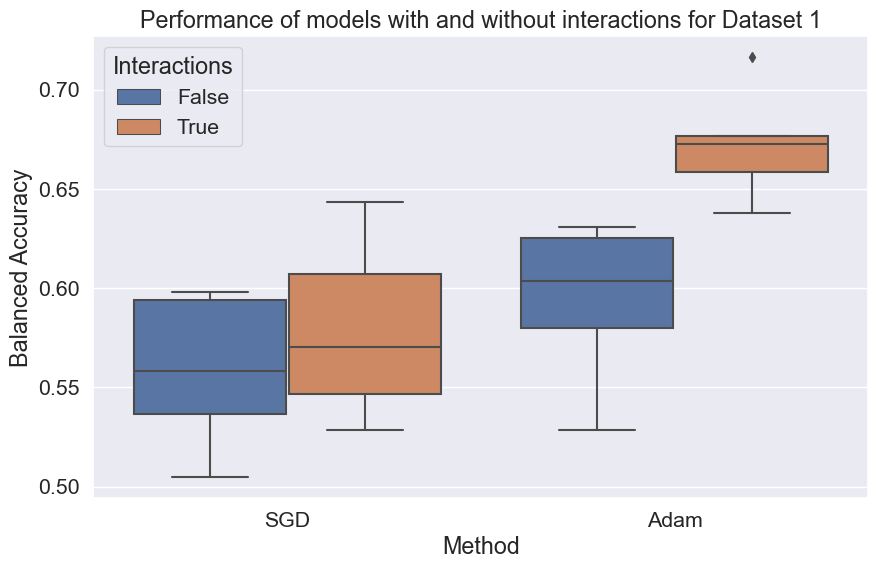

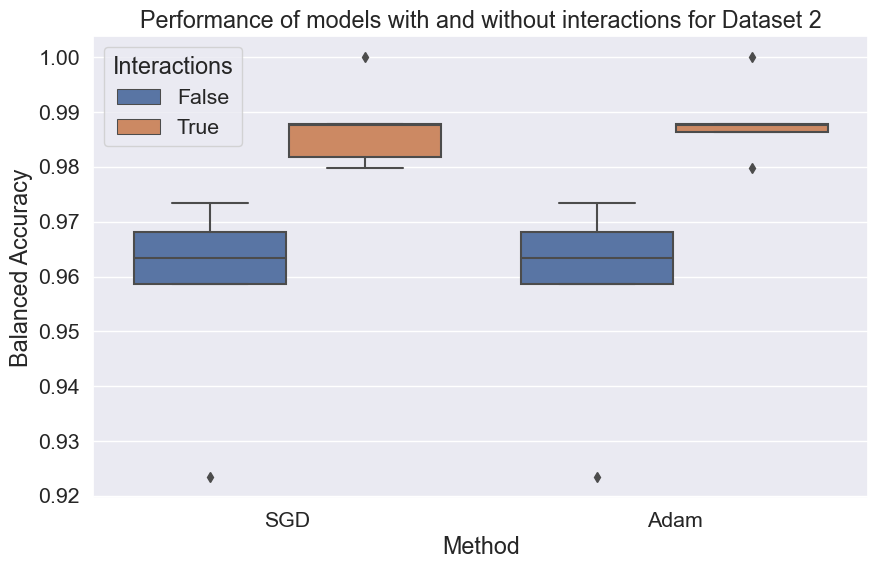

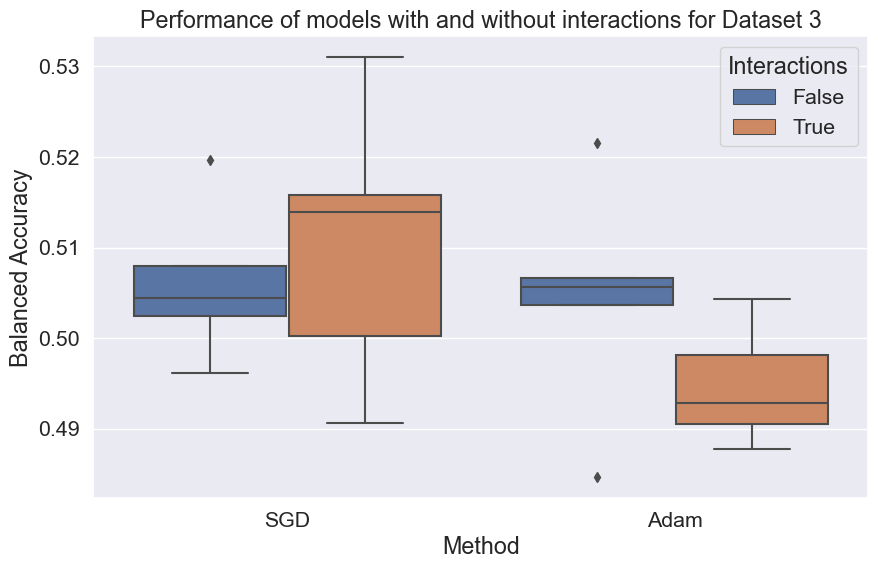

In [166]:
for dataset in final_results_df['dataset'].unique():
    df = final_results_df[final_results_df['dataset'] == dataset]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='method', y='balanced_accuracy', hue='interactions')
    plt.title(f'Performance of models with and without interactions for Dataset {dataset}')
    plt.xlabel('Method')
    plt.ylabel('Balanced Accuracy')
    plt.legend(title='Interactions')
    plt.show()